# Q.1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. \
b. What metric would you report for this dataset? \
c. What is its value?


## My process
1. High level overview of data
2. Explore outliers
3. Identify alternatives

### High level overview
**First, I import that data and display the first 5 rows and some basic statistics of the features**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
display(df.head(), df.describe())

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


**I confirm the strangely high mean value for 'order_amount'.\
I also notice the extremely high max values for 'order_amount' and 'total_items'. \
Plotting a boxplot of both features, it is clear that there are many high valued outliers.**

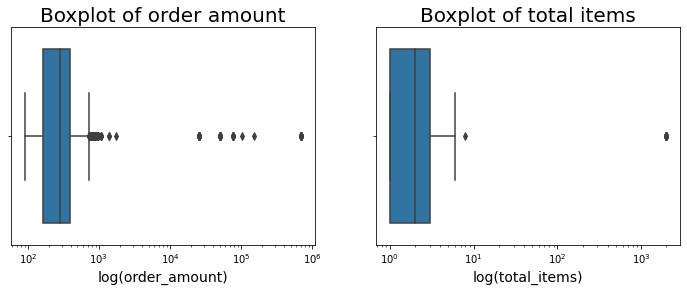

In [13]:
fig, ax = plt.subplots(ncols=2)
fig.set_figwidth(12)
sns.boxplot(x=df['order_amount'], ax=ax[0]).set_xscale("log")
sns.boxplot(x=df['total_items'], ax=ax[1]).set_xscale("log")
ax[0].set_title("Boxplot of order amount", fontsize=20)
ax[1].set_title("Boxplot of total items", fontsize=20)
ax[0].set_xlabel('log(order_amount)', fontsize=14)
ax[1].set_xlabel('log(total_items)', fontsize=14)
plt.show()

### Explore outliers
**After filtering the data for order amounts that are above the aov, I see there are 63 of these rows.\
However, there are only 6 unique combinations of ['shop_id', 'order_amount' and 'total_items'] composing these 63 rows.\
All of them are clearly outliers with shop 42 selling 2000 shoes at a time and shop 78 selling shoes at \$25725 each.**

In [11]:
aov = df['order_amount'].mean()
print("There are {} rows with order amount greater than the aov.".format(len(df[df['order_amount'] > aov])))

# Display unique row combinations with order amount greater than aov
df[df['order_amount'] > aov][['shop_id','order_amount','total_items']].drop_duplicates()

There are 63 rows with order amount greater than the aov.


,shop_id,order_amount,total_items
15,42,704000,2000
160,78,25725,1
490,78,51450,2
691,78,154350,6
1259,78,77175,3
2492,78,102900,4


### Identify alternatives
**An average metric that is robust to outliers is the median. The median of the dataset is 284 and is more representative of a true average value. We can see that after removing the outliers the median value does not change but the mean is 302.58, a relatively similiar figure.**

In [12]:
print("The median of the order amount of the full dataset is {}".format(df['order_amount'].median()))

df_outliers_removed = df[df['order_amount'] <= aov]
print("The median of the order amount without outliers is {}".format(df_outliers_removed['order_amount'].median()))
print("The mean of the order amount without outliers is {:.2f}".format(df_outliers_removed['order_amount'].mean()))

The median of the order amount of the full dataset is 284.0
The median of the order amount without outliers is 284.0
The mean of the order amount without outliers is 302.58


## Summary
a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. \
&emsp;**Using the mean is not robust to outliers. It can be seen that removing them decreases the aov from 3145.15 to 302.58.**\
b. What metric would you report for this dataset?\
&emsp;**I would use the median as the average metric instead.**\
c. What is its value?\
&emsp;**The median is \$284.**

# Q.2

a. How many orders were shipped by Speedy Express in total?\
&emsp;**54**

**SQL:**\
SELECT COUNT(DISTINCT Orders.OrderID)\
FROM Orders \
JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID\
WHERE Shippers.ShipperName = 'Speedy Express'

b. What is the last name of the employee with the most orders?\
&emsp;**Peacock**

**SQL:**\
SELECT Employees.LastName, COUNT(Orders.OrderID) AS NumOfOrders\
FROM Employees\
JOIN Orders ON Employees.EmployeeID = Orders.EmployeeID\
GROUP BY Employees.LastName\
ORDER BY NumOfOrders DESC\
LIMIT 1


c. What product was ordered the most by customers in Germany?\
&emsp;**Boston Crab Meat**

**SQL:**\
SELECT P.ProductID, P.ProductName, SUM(OD.Quantity) AS OrderCount\
FROM ORDERS O\
JOIN OrderDetails OD ON O.OrderID = OD.OrderID\
JOIN Products P ON OD.ProductID = P.ProductID\
JOIN Customers C ON O.CustomerID = C.CustomerID\
WHERE C.Country = 'Germany'\
GROUP BY P.ProductID, P.ProductName\
ORDER BY OrderCount DESC\
LIMIT 1